# GES DISC Tutorial - How to read and plot NetCDF MERRA-2 data in Python

Data Source:


Global Modeling and Assimilation Office (GMAO) (2015), MERRA-2 tavgM_2d_slv_Nx: 2d,Monthly mean,Time-Averaged,Single-Level,Assimilation,Single-Level Diagnostics V5.12.4, Greenbelt, MD, USA, Goddard Earth Sciences Data and Information Services Center (GES DISC), Accessed: 12/6/2021, 10.5067/AP1B0BA5PD2K

Link:

https://disc.gsfc.nasa.gov/information/howto?title=How%20to%20read%20and%20plot%20NetCDF%20MERRA-2%20data%20in%20Python

Helpful Sources for Data:

https://psl.noaa.gov/data/

https://disc.gsfc.nasa.gov/

In [1]:
# Import dependencies
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import os
from scipy.io import netcdf
from netCDF4 import Dataset


import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy import config

In [2]:
# Read dataset
data = Dataset('data/MERRA2_300.tavgM_2d_slv_Nx.201001.nc4.nc4', mode='r')

In [3]:
# Run the following line below to print MERRA-2 metadata. This line will print attribute and variable information. From the 'variables(dimensions)' list, choose which variable(s) to read in below.
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    History: Original file generated: Fri Jul  3 02:53:08 2015 GMT
    Filename: MERRA2_300.tavgM_2d_slv_Nx.201001.nc4
    Comment: GMAO filename: d5124_m2_jan00.tavg1_2d_slv_Nx.monthly.201001.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2TMNXSLV
    RangeBeginningDate: 2010-01-01
    RangeEndingDate: 2010-01-31
    GranuleID: MERRA2_300.tavgM_2d_slv_Nx.201001.nc4
    ProductionDateTime: Original file generated: Fri Jul  3 02:53:08 2015 GMT
    LongName: MERRA2 tavg1_2d_slv_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Single-Level Diagnostics Monthly Mean
    Title: MERRA2 tavg1_2d_slv_Nx: 2d,1-Hourly,Time-Av

In [4]:
# Read in the 'T2M' 2-meter air temperature variable:
lons = data.variables['lon'][:]
lats = data.variables['lat'][:]
lon, lat = np.meshgrid(lons, lats)
T2M = data.variables['T2M'][:,:,:]

In [5]:
# If using MERRA-2 data with multiple time indices in the file, the following line will extract only the first time index.
# Note: Changing T2M[0,:,:] to T2M[10,:,:] will subset to the 11th time index.

T2M = T2M[0,:,:]

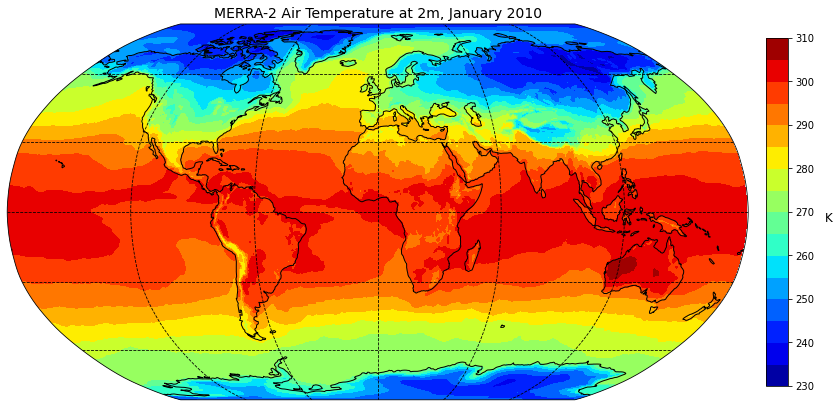

In [7]:
# Plot the data using matplotlib and cartopy

# Set the figure size, projection, and extent
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')

# Set contour levels, then draw the plot and a colorbar
clevs = np.arange(230,311,5)
plt.contourf(lon, lat, T2M, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 Air Temperature at 2m, January 2010', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

# Save the plot as a PNG image

fig.savefig('MERRA2_t2m.png', format='png', dpi=360)

# Notebook Tutorial - Lesson 3: Plotting data from NetCDF files

Link:

https://notebook.community/jonblower/python-viz-intro/Lesson%203.%20Plotting%20data%20from%20NetCDF%20files/3.%20Plotting%20data%20from%20NetCDF%20files

Data Source:
https://psl.noaa.gov/cgi-bin/db_search/DBListFiles.pl?did=98&tid=91102&vid=1913


GitHub: https://github.com/jonblower/python-viz-intro


In [8]:
# Import Dependencies
import netCDF4

In [9]:
nc = netCDF4.Dataset('data/pottmp.2014.nc')

In [10]:
# Get dictionary keys from dataset
nc.variables.keys()

dict_keys(['level', 'lon', 'lat', 'date', 'timePlot', 'time', 'pottmp'])

In [11]:
# Define potential temperature variable 'pottmp'
pottmp = nc.variables['pottmp']

In [12]:
# Find long name of 'pottmp' key 
#(can also use .standard_name, look up standard names at: http://cfconventions.org/standard-names.html)
pottmp.var_desc

'potential temperature'

In [13]:
# Find units of measurement for potential temperature variable
pottmp.units

'K'

In [14]:
# Find shape of variable (number of dimensions and number of data points)
pottmp.shape

(12, 40, 418, 360)

In [15]:
# Find names of dimensions for variable
pottmp.dimensions

('time', 'level', 'lat', 'lon')

In [16]:
# Define data to use for simple plot
data = pottmp[0,0]
data.shape

(418, 360)

In [17]:
# Define lon and lat variables
lon = nc.variables['lon']
lat = nc.variables['lat']

In [19]:
# Define values in lon and lat variables
lonvals = lon[:]
latvals = lat[:]

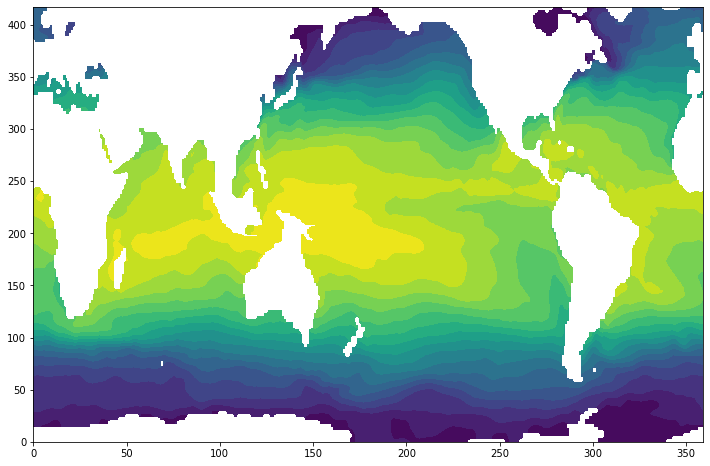

In [25]:
# Plot simple contour map with two dimensional array
import matplotlib.pyplot as plt

# These two lines are needed to make matplotlib plot figures inline and at a decent size.
# They are not needed in scripts.
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)


# Add Title
plt.title('Potential Temperature', size= 14)

# These lines do the actual plotting
plt.contourf(data, 20)
plt.show()

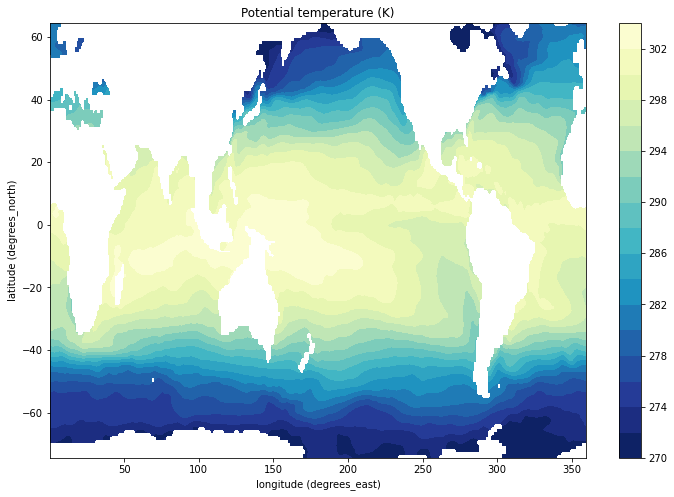

In [21]:
# Plot simple contour map with two dimensional array, add labels and color bar
import matplotlib.pyplot as plt
# These two lines are needed to make matplotlib plot figures inline and at a decent size.
# They are not needed in scripts.
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

# Add Title, Color Bar and Labels
plt.title (pottmp.long_name + ' (' + pottmp.units + ')')
plt.xlabel(lon.long_name    + ' (' + lon.units    + ')')
plt.ylabel(lat.long_name    + ' (' + lat.units    + ')')

# Plot Data and Color Bar
plt.contourf(lonvals, latvals, data, 20, cmap=plt.get_cmap('YlGnBu_r'))
plt.colorbar()
plt.show()

## Plot a Vertical Profile

In [22]:
# Define profile variable as slice of pottmp
profile = pottmp[0,:,214,180]
# "temperature values for all values of depth at the 214th latitude index and the 180th longitude index"

In [23]:
# Define depth variables
depthvar = nc.variables['level']
depthvals = depthvar[:]

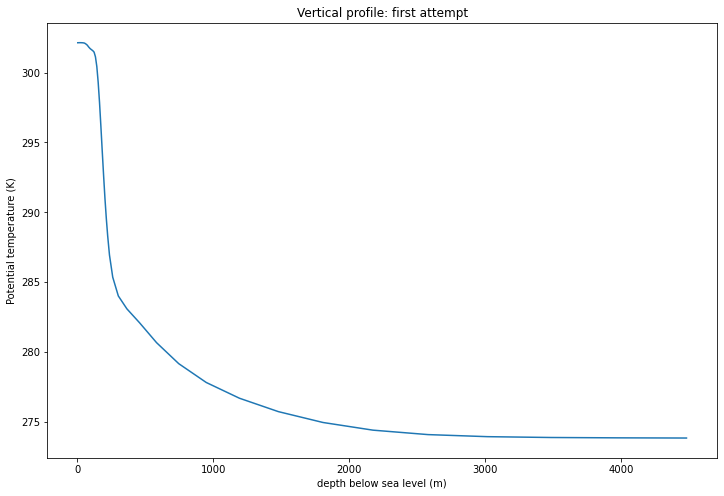

In [24]:
# Plot Temperature vs Depth
plt.plot(depthvals, profile)
plt.xlabel(depthvar.long_name + ' (' + depthvar.units + ')')
plt.ylabel(pottmp.long_name   + ' (' + pottmp.units   + ')')
plt.title('Vertical profile: first attempt')
plt.show()

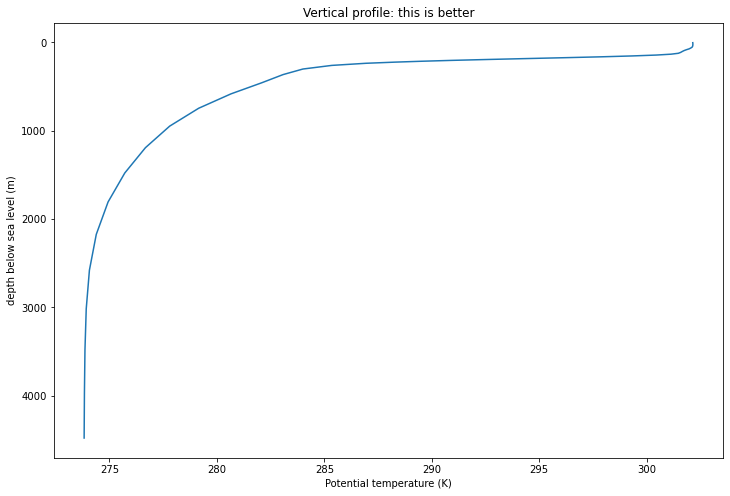

In [25]:
# Reverse Depth Axis and Plot Depth vs Temperature
plt.plot(profile, depthvals)
plt.xlabel(pottmp.long_name   + ' (' + pottmp.units   + ')')
plt.ylabel(depthvar.long_name + ' (' + depthvar.units + ')')

plt.gca().invert_yaxis() # Gets the axes of the plot and reverses the y axis

plt.title('Vertical profile: this is better')
plt.show()